<a href="https://colab.research.google.com/github/RENISA-GRACELIN/Online_Internship_Projects/blob/main/ResnetwithRF_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

700 samples - split into 2 train and val new dataset (8:2)

560 in each training class
140 in each testing class
LOCATION    /content/drive/MyDrive/fruits/data7

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import cv2
import os
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet import preprocess_input

In [3]:
model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [4]:
# define a function to extract features from an image using the MobileNetV2 model
def extract_features(image_path):
    # load the image and resize it to the input shape of the MobileNetV2 model
    image = load_img(image_path, target_size=(224, 224))
    # convert the image to a numpy array
    image = img_to_array(image)
    # preprocess the image for the MobileNetV2 model
    image = preprocess_input(image)
    # use the ResNet152V2 model to extract features from the image
    features = model.predict(np.array([image]))
    # flatten the feature vector to a 1D array
    features = features.flatten()
    return features

In [5]:
model.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                        

In [6]:
# define the data directory and subdirectories
data_dir = '/content/drive/MyDrive/DR'
train_dir = os.path.join(data_dir, '/content/drive/MyDrive/DR/Train')
test_dir = os.path.join(data_dir, '/content/drive/MyDrive/DR/Test')
valid_dir = os.path.join(data_dir, '/content/drive/MyDrive/DR/Valid')

In [7]:
train_data = []
train_labels = []
valid_data = []
valid_labels = []
test_data = []
test_labels = []


In [8]:
for class_dir in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_dir)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        features = extract_features(image_path)
        train_data.append(features)
        train_labels.append(class_dir)

1/1 [==============================] - 0s 30ms/step


In [9]:
for class_dir in os.listdir(valid_dir):
    class_path = os.path.join(valid_dir, class_dir)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        features = extract_features(image_path)
        valid_data.append(features)
        valid_labels.append(class_dir)

1/1 [==============================] - 0s 35ms/step


In [10]:
for class_dir in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_dir)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        features = extract_features(image_path)
        test_data.append(features)
        test_labels.append(class_dir)

1/1 [==============================] - 0s 31ms/step


In [11]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)
valid_data = np.array(train_data)
valid_labels = np.array(train_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels)


In [12]:
rf= RandomForestClassifier()
#n_estimators = 50, random_state = 42
# Train the model on training data
rf.fit(train_data, train_labels) #For sklearn no one hot encoding

RandomForestClassifier()

In [13]:
accuracy = rf.score(test_data,test_labels)
print(f'Accuracy: {accuracy}')

Accuracy: 0.42


In [14]:
accuracy = rf.score(valid_data,valid_labels)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [15]:
model.save("newmodel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
def predictRF(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  X=extract_features(filename)
  X=np.array(X)
  X=X.reshape(1,-1)
  output=rf.predict(X)
  print(output)


1/1 [==============================] - 0s 33ms/step
['4']


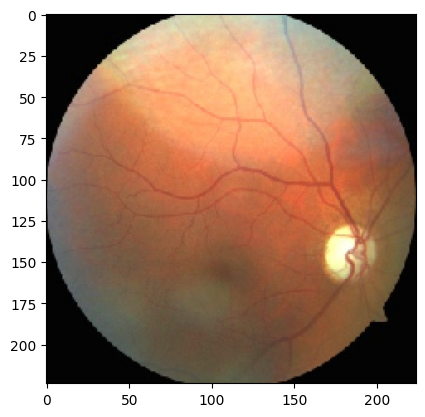

In [17]:
predictRF("/content/drive/MyDrive/DR/Test/0/102.jpg")

1/1 [==============================] - 0s 34ms/step
['2']


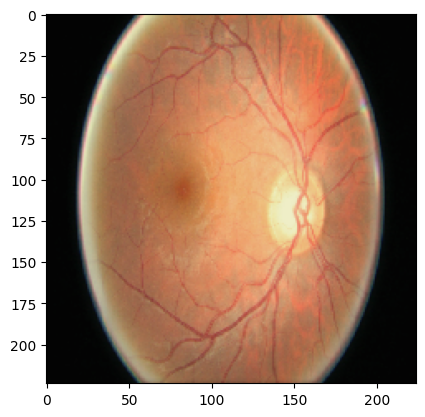

In [18]:
predictRF("/content/drive/MyDrive/DR/Test/1/9366_left.png")

1/1 [==============================] - 0s 40ms/step
['2']


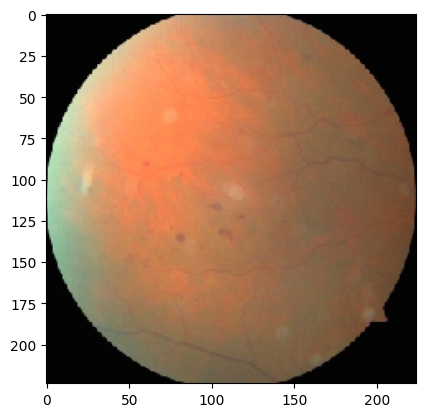

In [19]:
predictRF("/content/drive/MyDrive/DR/Test/2/205.jpg")

1/1 [==============================] - 0s 35ms/step
['3']


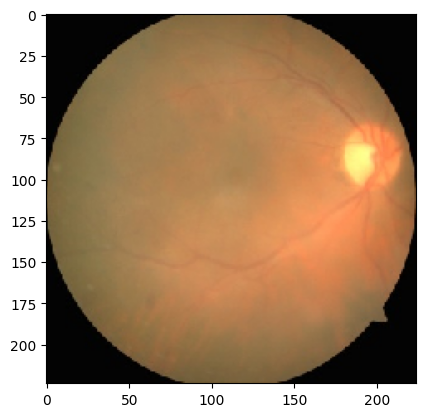

In [20]:
predictRF("/content/drive/MyDrive/DR/Test/3/272.jpg")

1/1 [==============================] - 0s 34ms/step
['0']


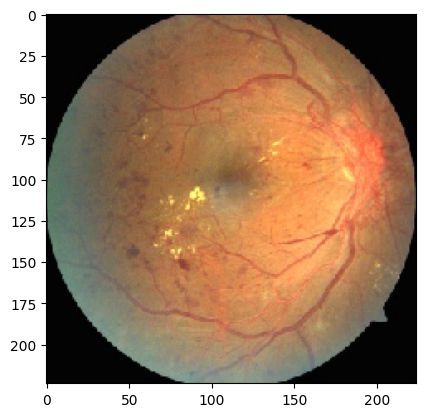

In [21]:
predictRF("/content/drive/MyDrive/DR/Test/4/569.jpg")

In [31]:
# Make sure you provide the same target size as initialied for the image size
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_set=train_datagen.flow_from_directory('/content/drive/MyDrive/DR/Train',target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')
class_name = train_set.class_indices
print(class_name)


Found 1750 images belonging to 5 classes.
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}


In [34]:
test_set=train_datagen.flow_from_directory('/content/drive/MyDrive/DR/Test',target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 250 images belonging to 5 classes.


In [35]:
valid_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DR/Valid',
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 500 images belonging to 5 classes.


Text(0.5, 1.0, 'Confusion Matrix')

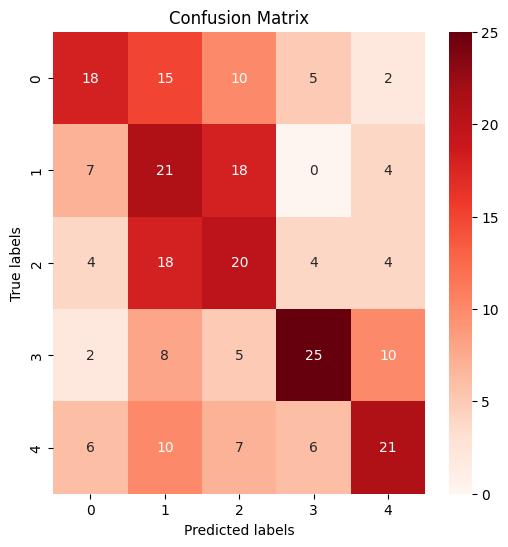

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
y_pred=rf.predict(test_data)
# compute confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# create heatmap from confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d", xticklabels=train_set.class_indices.keys(),
            yticklabels=train_set.class_indices.keys(), ax=ax)

# set axis labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [37]:
from sklearn.metrics import classification_report

# Compute classification report
report = classification_report(test_labels, y_pred, target_names=train_set.class_indices.keys())

# Print classification report
print(report)

              precision    recall  f1-score   support

           0       0.49      0.36      0.41        50
           1       0.29      0.42      0.34        50
           2       0.33      0.40      0.36        50
           3       0.62      0.50      0.56        50
           4       0.51      0.42      0.46        50

    accuracy                           0.42       250
   macro avg       0.45      0.42      0.43       250
weighted avg       0.45      0.42      0.43       250



In [38]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
precision = precision_score(test_labels, y_pred, average='macro')
recall = recall_score(test_labels, y_pred, average='macro')
accuracy = accuracy_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred, average='macro')

print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)
print('F1 Score:', f1)

Precision: 0.4497363216875412
Recall: 0.42000000000000004
Accuracy: 0.42
F1 Score: 0.4277571558521248


Text(0.5, 1.0, 'Confusion Matrix')

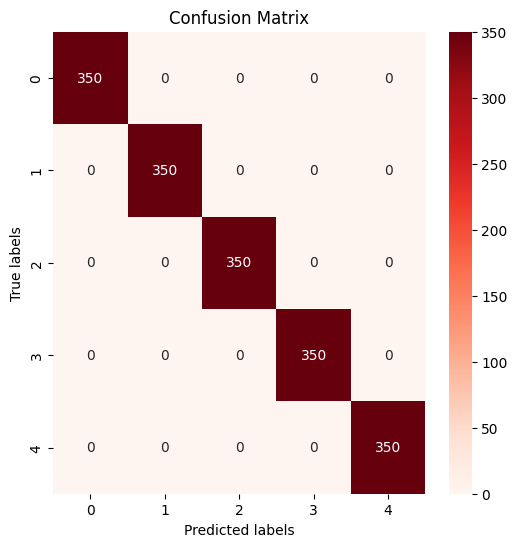

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
y_pred=rf.predict(valid_data)
# compute confusion matrix
cm = confusion_matrix(valid_labels, y_pred)

# create heatmap from confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d", xticklabels=train_set.class_indices.keys(),
            yticklabels=train_set.class_indices.keys(), ax=ax)

# set axis labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [40]:
from sklearn.metrics import classification_report

# Compute classification report
report = classification_report(valid_labels, y_pred, target_names=train_set.class_indices.keys())

# Print classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       350
           2       1.00      1.00      1.00       350
           3       1.00      1.00      1.00       350
           4       1.00      1.00      1.00       350

    accuracy                           1.00      1750
   macro avg       1.00      1.00      1.00      1750
weighted avg       1.00      1.00      1.00      1750



In [41]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
precision = precision_score(valid_labels, y_pred, average='macro')
recall = recall_score(valid_labels, y_pred, average='macro')
accuracy = accuracy_score(valid_labels, y_pred)
f1 = f1_score(valid_labels, y_pred, average='macro')

print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)
print('F1 Score:', f1)

Precision: 1.0
Recall: 1.0
Accuracy: 1.0
F1 Score: 1.0
